In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os
plt.style.use('rose-pine')



In [2]:
def delay(time : np.ndarray, sig : np.ndarray) -> float : 
    """
    delay return the time delay of the signal

    Parameters
    ----------
    time : np.ndarray
        _description_
    sig : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """    
    return time[np.argmax(abs(sig))]

In [3]:
def delay_dispersion(time, signal) -> float: 
    """
    delay_dispersion return the dispersion of the signal given a threshold 1/e * max(signal)

    Parameters
    ----------
    time : np.ndarray
        _description_
    signal : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """    
    mask = np.abs(signal) > np.exp(-1) * np.max(np.abs(signal))
    time_window = time[mask]
    
    return (time_window[-1] - time_window[0]) / 2 

In [4]:
import scipy.constants as cst
n_c = 50e9 ** 2 /cst.e**2*(cst.m_e*cst.epsilon_0)

In [15]:
amplitude_4 = []
pulse_4 = []
delay_list_4 = []
std_list = []
dir = os.listdir('../output_amp_4')
for i , subfolder in tqdm(enumerate(dir)) :
    if subfolder[0] == 'a' : 
        IQ_list = np.array([np.load(f'../output_amp_4/{subfolder}/{file}') for file in os.listdir(f'../output_amp_4/{subfolder}') if file[0] == 'I'])
        std_list.append( np.array([np.load(f'../output_amp_4/{subfolder}/{file}',  allow_pickle=True) for file in os.listdir(f'../output_amp_4/{subfolder}') if file[0] == 's']))
        amplitude_4.append(float(subfolder.split('_')[1]))
        pulse_4.append(IQ_list[:,1])
        delay_list_4.append([delay(*IQ) for IQ in IQ_list])

0it [00:00, ?it/s]

In [17]:
np.save('delay_list_4', delay_list_4)
np.save('pulse_4', pulse_4)
np.save('amplitude_4', amplitude_4)
np.save('std_list', std_list)

In [39]:
std_list = np.load('std_list.npy', allow_pickle=True)

In [51]:
std_list[:,:,0].astype(float)

array([[0.0616477 , 0.06734938, 0.06956718, ..., 0.06247908, 0.06728199,
        0.06841275],
       [0.06774304, 0.06578439, 0.06448698, ..., 0.06020801, 0.06273913,
        0.06385873],
       [0.06660554, 0.06444371, 0.06485036, ..., 0.06747881, 0.06864091,
        0.06699617],
       ...,
       [0.06572569, 0.06799449, 0.07073614, ..., 0.06574436, 0.06511459,
        0.06974945],
       [0.06515931, 0.06184774, 0.06295981, ..., 0.06748199, 0.06843544,
        0.06629923],
       [0.06911635, 0.06208449, 0.06836347, ..., 0.06685966, 0.0691931 ,
        0.06825321]])

In [52]:
std_tot_std = np.std(std_list[:,:,0].astype(float), axis = 1)

In [8]:
np.save('delay_list_3', delay_list_3)
np.save('pulse_3', pulse_3)
np.save('amplitude_4', amplitude_4)

In [17]:
delay_list_2 = np.load('delay_list_2.npy')
pulse = np.load('pulse_2.npy')

In [26]:
# delay_list = np.load('delay.npy')
# delay_list_dispersion = np.load('delay_dispersion.npy')
# rms = np.load('rms.npy')
pulse_4 = np.load('pulse_4.npy')
delay_list_4 = np.load('delay_list_4.npy')
amplitude_4 = np.load('amplitude_4.npy')

In [75]:
3e8 / (50e9 * np.sqrt(0.01 * 0.1 * np.log(10)))

0.12503839949598308

In [28]:
amp = np.std(pulse_4, axis = 2)

In [31]:
amplitude_4 = np.array(amplitude_4)

In [30]:
index = np.argsort(amplitude_4)

In [33]:
dt_theo =  2 * 0.1 / 3e8 * np.sqrt(10) * np.array(amplitude_4)

In [61]:
rms_n, rms_td = np.load('1d.npy')

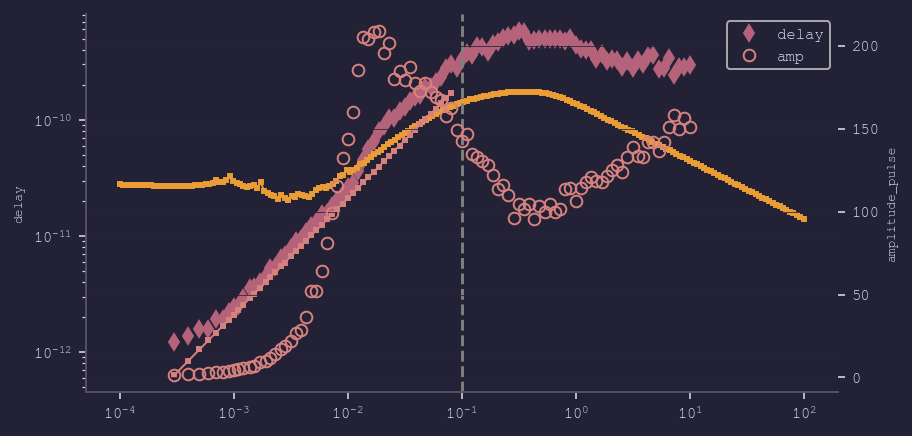

In [63]:
fig, ax = plt.subplots()
err1 = ax.plot(amplitude_4, np.std(delay_list_4, axis = 1), marker = 'd', label = 'delay', lw = 0)
ax.plot(rms_n, rms_td, label = 'rms', marker = 's', lw = 1, ms = 2)
ax.set_xscale('log')
ax.set_ylabel('delay')
ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot([], [])
ax2.plot([], [])
err2 = ax2.plot(amplitude_4, np.std(amp, axis = 1), marker = 'o',label = 'amp', mfc = 'none', lw = 0)
ax2.set_ylabel('amplitude_pulse')
ax2.legend(handles = err1 + err2, loc = 'upper right')
ax.axvline(0.1, color = 'grey', ls = '--')
err3 = ax.plot(amplitude_4[index][:50] ,dt_theo[index][:50], label = 'rms', marker = 's', lw = 1, ms = 2)


/home/andrea/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


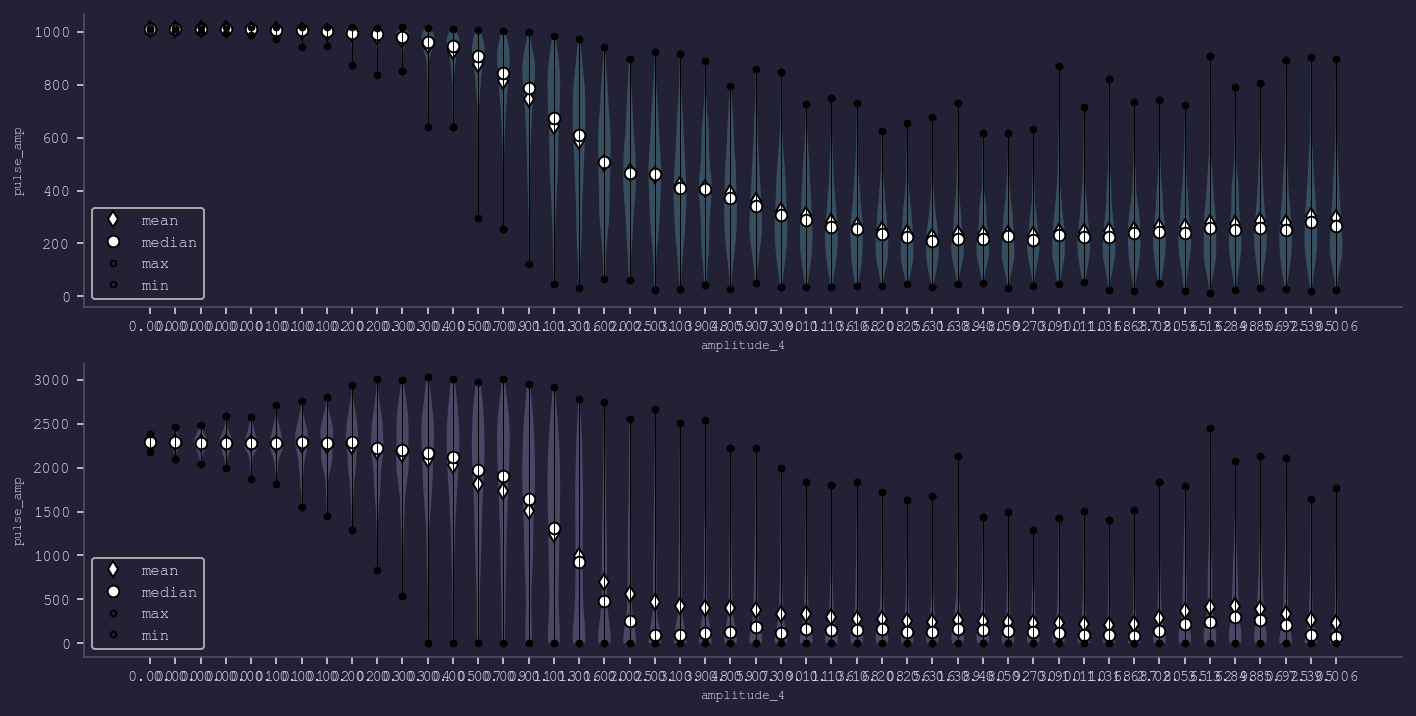

In [56]:
fig, axs = plt.subplots(2, 1, figsize = (10, 5))
ax, ax2 = axs
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.mean(amp, axis = 1)[index][::2], lw = 0, marker = 'd', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.median(amp, axis = 1)[index][::2], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.max(amp, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
ax.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.min(amp, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax.violinplot(np.array(amp)[index][::2, :].real.T, showmeans=False, showmedians=False)


ax.set_xticks(range(1, len( np.array(amplitude_4)[index][::2]) + 1))
ax.set_xticklabels([str(r)[:5] for r in np.array(amplitude_4)[index][::2]])
ax.set_xlabel('amplitude_4')
ax.set_ylabel('pulse_amp')
for pc in violins['bodies']:
    pc.set_alpha(.4)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.5)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax.legend()
amp2 = np.max(pulse_4, axis = 2)
ax2.plot([],[])

ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.mean(amp2, axis = 1)[index][::2], lw = 0, marker = 'd', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.median(amp2, axis = 1)[index][::2], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.max(amp2, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
ax2.plot(range(1, len( np.array(amplitude_4)[index][::2]) + 1), np.min(amp2, axis = 1)[index][::2], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax2.violinplot(np.array(amp2)[index][::2,:].real.T, showmeans=False, showmedians=False)


ax2.set_xticks(range(1, len( np.array(amplitude_4)[index][::2]) + 1))
ax2.set_xticklabels([str(r)[:5] for r in np.array(amplitude_4)[index][::2]])
ax2.set_xlabel('amplitude_4')
ax2.set_ylabel('pulse_amp')
for pc in violins['bodies']:
    pc.set_alpha(.4)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.5)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax2.legend()
plt.show()


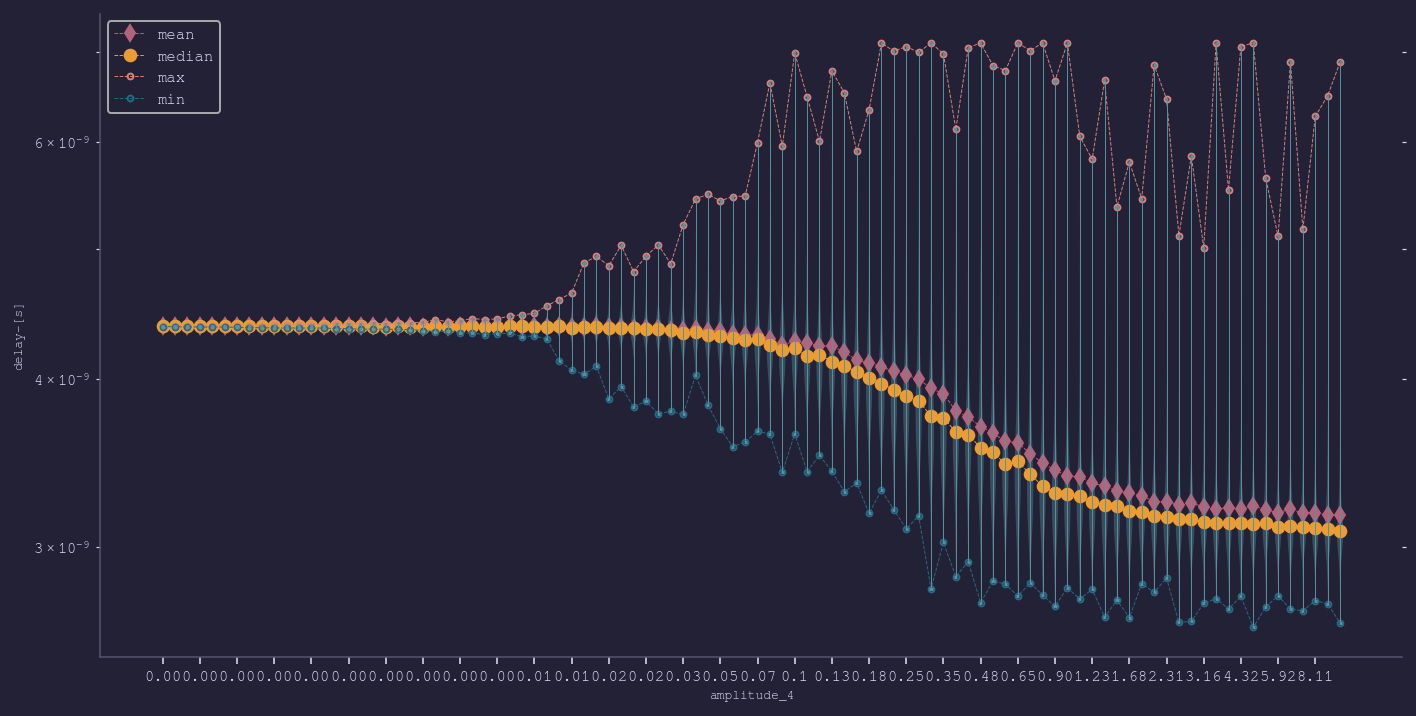

In [57]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.mean(delay_list_4, axis = 1)[index], lw = .5, marker = 'd', mew = 1 ,ls = '--', label = 'mean')
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.median(delay_list_4, axis = 1)[index], lw = .5, marker = 'o', mew = 1. ,ls = '--', label = 'median')
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.max(delay_list_4, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1. ,ls = '--', label = 'max')
ax.plot(range(1, len( np.array(amplitude_4)[index]) + 1), np.min(delay_list_4, axis = 1)[index], lw = .5, marker = '.', mfc = 'none', mew = 1, ls = '--', label = 'min')
violins = ax.violinplot(np.array(delay_list_4)[index].real.T, showmeans=False, showmedians=False)

ax.set_yscale('log')

ax.set_xticks(range(1, len( np.array(amplitude_4)[index]) + 1, 3))
ax.set_xticklabels([str(r)[:4] for r in np.array(amplitude_4)[index][::3]])
ax.set_xlabel('amplitude_4')
ax.set_ylabel('delay-[s]')

for pc in violins['bodies']:

    pc.set_alpha(.4)

violins['cbars'].set_linewidth(.5)

ax.legend()
plt.show()


/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_70224/3723487253.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(np.array(delay_list_4)[index][i].real, ax = ax, lw = 1, palette=plt.cm.viridis(i/30))
/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andrea/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

(4.3e-09, 4.45e-09)

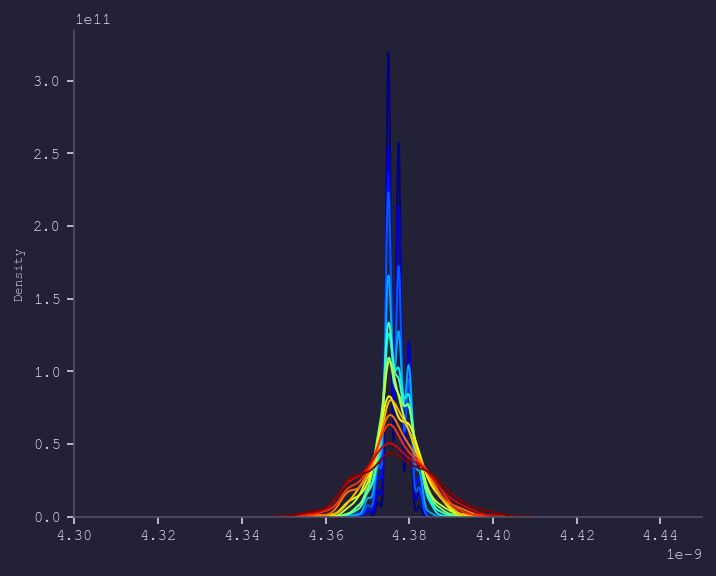

In [58]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 15)))
for i in range(5,20,1) : 
    sns.kdeplot(np.array(delay_list_4)[index][i].real, ax = ax, lw = 1, palette=plt.cm.viridis(i/30))
ax.set_xlim(4.3e-9, 4.45e-9)


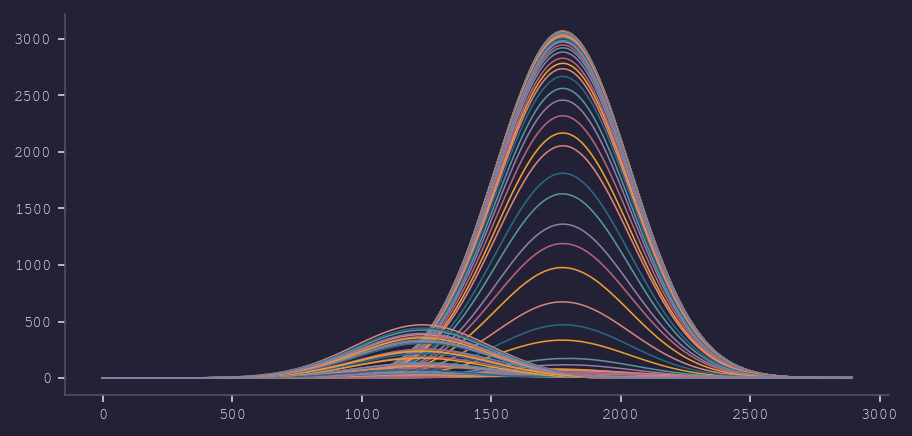

In [59]:
fig, ax = plt.subplots()
plot = ax.plot(abs(np.mean(pulse_4, axis = 1).T), lw = .8)
plt.show()